In [1]:
from spelt.ephys import ephys

path = '/home/isabella/Documents/isabella/jake/recording_data/r1503/2024-03-20'
sheet_url = 'https://docs.google.com/spreadsheets/d/1cZxgOw7worcVZq8wIPslmU2jD__xm1MXnNgbs1-9ros/edit#gid=0'

obj = ephys('NP2_openephys', path, sheet_url)
obj.load_ttl()
obj.sync_data

No trial list specified, loading TTL data for all trials
Loading TTL data for 240320_r1503_sleep-ml_1
Loading TTL data for 240320_r1503_open-field-ml_2
Loading TTL data for 240320_r1503_open-field-sl_3


[{'ttl_timestamps': array([], dtype=float64),
  'recording_timestamps': array([163.06506667, 163.0651    , 163.06513333, ..., 458.4818    ,
         458.48183333, 458.48186667])},
 {'ttl_timestamps': array([  9.951     ,  13.6947    ,  13.7347    , ..., 745.6128    ,
         745.65283333, 745.69283333]),
  'recording_timestamps': array([469.6373    , 469.63733333, 469.63736667, ..., 749.31696667,
         749.317     , 749.31703333])},
 {'ttl_timestamps': array([  8.28493333,  12.2675    ,  12.30753333, ..., 284.6963    ,
         284.73633333, 284.7763    ]),
  'recording_timestamps': array([  3.3688    ,   3.36883333,   3.36886667, ..., 288.00403333,
         288.00406667, 288.0041    ])}]

In [13]:
import numpy as np
len(obj.sync_data[1]['ttl_timestamps'])/25
len(obj.sync_data[1]['recording_timestamps'])/30000

749.3682666666666

In [58]:
import matplotlib.pyplot as plt
obj.sync_data[1]['recording_timestamps'][1536]

0.0

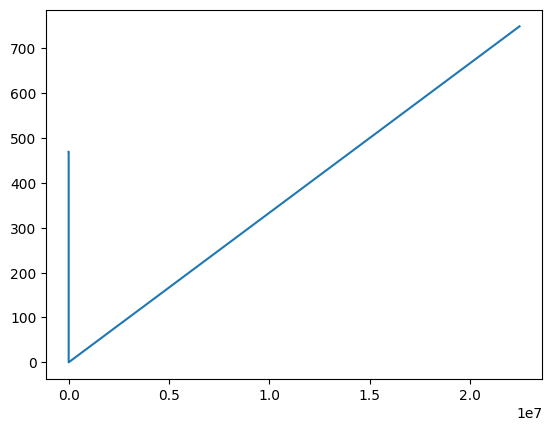

In [59]:
plt.plot(obj.sync_data[1]['recording_timestamps'])

In [64]:
np.load('/data/isabella/jake/recording_data/r1503/2024-03-20/240320_r1503_open-field-ml_2/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/timestamps.npy')

array([469.6373    , 469.63733333, 469.63736667, ..., 749.31696667,
       749.317     , 749.31703333])

In [66]:
import pandas as pd
pd.read_csv('teste01_220729_67DLC_resnet50_Video_TesteMar20shuffle1_18500.csv')

,scorer,DLC_resnet50_Video_TesteMar20shuffle1_18500,DLC_resnet50_Video_TesteMar20shuffle1_18500.1,DLC_resnet50_Video_TesteMar20shuffle1_18500.2,DLC_resnet50_Video_TesteMar20shuffle1_18500.3,DLC_resnet50_Video_TesteMar20shuffle1_18500.4,DLC_resnet50_Video_TesteMar20shuffle1_18500.5,DLC_resnet50_Video_TesteMar20shuffle1_18500.6,DLC_resnet50_Video_TesteMar20shuffle1_18500.7,DLC_resnet50_Video_TesteMar20shuffle1_18500.8,DLC_resnet50_Video_TesteMar20shuffle1_18500.9,DLC_resnet50_Video_TesteMar20shuffle1_18500.10,DLC_resnet50_Video_TesteMar20shuffle1_18500.11
0,bodyparts,bodypart1,bodypart1,bodypart1,bodypart2,bodypart2,bodypart2,bodypart3,bodypart3,bodypart3,objectA,objectA,objectA
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,380.4707336425781,336.8404846191406,0.9974755644798279,368.7890625,333.2366027832031,0.9981478452682495,355.7623291015625,328.1758117675781,0.9985371828079224,348.7682189941406,327.9749450683594,0.9975671768188477
3,1,380.27294921875,336.3528137207031,0.9984520673751831,368.8758544921875,332.5858459472656,0.9983289837837219,355.9618225097656,327.43402099609375,0.999189555644989,350.7244873046875,328.6888732910156,0.9988582134246826
4,2,378.92572021484375,337.8738098144531,0.9986074566841125,367.7665710449219,331.8252258300781,0.9981550574302673,355.5965881347656,325.6524963378906,0.9995786547660828,349.2287292480469,326.80096435546875,0.9992651343345642
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18296,18294,367.2505798339844,217.0804443359375,0.9969697594642639,353.9390869140625,222.72471618652344,0.9991273283958435,342.1064453125,230.30711364746094,0.9996883869171143,335.83990478515625,242.7322998046875,0.9974084496498108
18297,18295,366.8319091796875,217.31214904785156,0.9973816275596619,353.2005920410156,222.76309204101562,0.9991993308067322,342.30426025390625,230.47067260742188,0.9997281432151794,334.98876953125,242.28695678710938,0.9965540170669556
18298,18296,366.87115478515625,216.30177307128906,0.9946721196174622,353.0810546875,222.24900817871094,0.9988816380500793,341.70635986328125,231.12966918945312,0.9996603727340698,336.328125,242.81797790527344,0.9983940720558167
18299,18297,368.0161437988281,217.36280822753906,0.9968771934509277,353.4495544433594,223.36276245117188,0.9988585710525513,342.184326171875,230.44078063964844,0.9997338652610779,335.8312072753906,242.22720336914062,0.9978095889091492


In [5]:
len(obj.sync_data[1]['recording_timestamps'])

22481048

In [4]:
import spikeinterface.extractors as se
se.read_openephys('/home/isabella/Documents/isabella/jake/recording_data/r1503/2024-03-20/240320_r1503_open-field-ml_2')

OpenEphysBinaryRecordingExtractor: 384 channels - 30.0kHz - 1 segments - 22,481,048 samples 
                                   749.37s (12.49 minutes) - int16 dtype - 16.08 GiB

In [14]:
import numpy as np
obj.load_spikes()
mask = obj.spike_data['spike_trial'] == 1

spike_times = obj.spike_data['spike_times'][mask] - obj.trial_offsets[1]


854

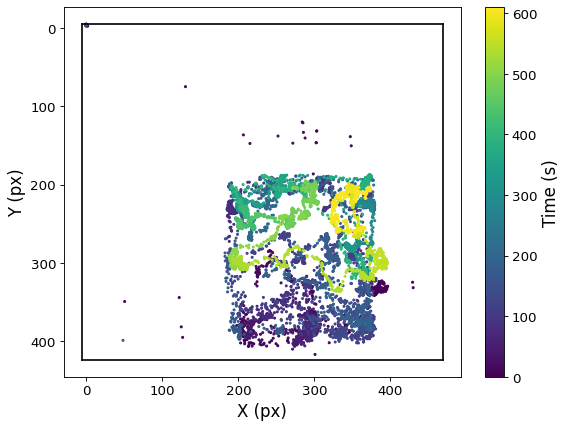

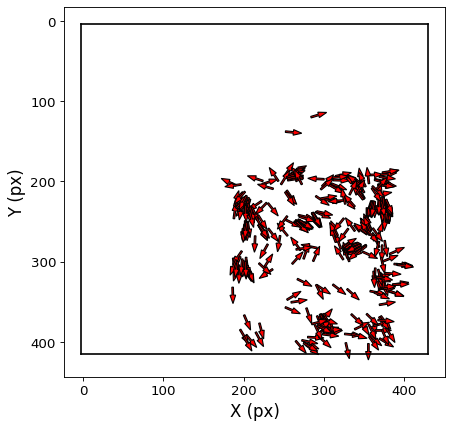

In [16]:
import pyratlib as rat
import pandas as pd

df = pd.read_csv('teste01_220729_67DLC_resnet50_Video_TesteMar20shuffle1_18500.csv')

rat.Trajectory(df, bodyPart='bodypart1', bodyPartBox='objectA', fontsize =15)

rat.HeadOrientation(df, step = 50, head = "bodypart1", tail  = "bodypart2", arrow_color = 'red')
